In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns


# DBSCAN import
from sklearn.cluster import DBSCAN

# Scaler import
from sklearn.preprocessing import MinMaxScaler

import env
import wrangle

In [2]:
df = wrangle.get_curriculum_logs()
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0


In [3]:
df = wrangle.prep_curriculum_data()
df.head()

,time,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program
date,,,,,,,,,,,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Web Development
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Web Development
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Web Development
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Web Development
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,Web Development


# Explore

### Question 1: Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [4]:
# curriculum access value counts per program

df.program.value_counts()


Web Development    743918
Data Science       103412
Name: program, dtype: int64

In [5]:
# top 5 overall pages
print('10 Most Popular Pages in Web Dev Program & DS')

df.groupby(['program'])['endpoint'].value_counts().head(10)

10 Most Popular Pages in Web Dev Program & DS


program       endpoint                                
Data Science  /                                           8358
              search/search_index.json                    2203
              classification/overview                     1785
              1-fundamentals/modern-data-scientist.jpg    1655
              1-fundamentals/AI-ML-DL-timeline.jpg        1651
              1-fundamentals/1.1-intro-to-data-science    1633
              classification/scale_features_or_not.svg    1590
              fundamentals/AI-ML-DL-timeline.jpg          1443
              fundamentals/modern-data-scientist.jpg      1438
              sql/mysql-overview                          1424
Name: endpoint, dtype: int64

In [6]:
# remove pages that are not part of curriculum pages

df = df[df.endpoint.str.contains('jpeg') != True]

df = df[df.endpoint.str.contains('json') != True]

df = df[df.endpoint.str.contains('jpg') != True]

df = df[df.endpoint.str.contains('appendix') != True]

df = df[df.endpoint.str.contains('Appendix') != True]

df = df[df.endpoint != '/']

df = df[df.endpoint != 'toc']

In [7]:
# page views per cohort with count
page_views = df.groupby(['cohort_name'])['endpoint'].agg(['count', 'unique'])
page_views

,count,unique
cohort_name,,
Andromeda,22255,"[assets/js/pdfmake.min.js.map, html-css, html-..."
Apex,27737,"[html-css, html-css/introduction, java-i, java..."
Apollo,4,"[content/html-css, content/html-css/gitbook/im..."
Arches,7670,"[javascript-i, javascript-i/functions, javascr..."
Badlands,74,"[prework/fundamentals, prework/fundamentals/va..."
Bash,14773,"[html-css, html-css/introduction, prework/cli,..."
Bayes,20456,"[3-sql/1-mysql-overview, 2-storytelling/bad-ch..."
Betelgeuse,26128,"[html-css, spring, html-css/introduction, html..."
Ceres,35113,"[quiz, javascript-i, spring, java-i, java-iii,..."


In [8]:
# create ds dataframe
DS_df = df[(df.program == 'Data Science')]
DS_df.head(5)

,time,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program
date,,,,,,,,,,,,,,,
2019-08-20,09:40:28,3-sql/1-mysql-overview,470,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science
2019-08-20,09:40:30,2-storytelling/bad-charts,467,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science
2019-08-20,09:41:02,1-fundamentals/1.1-intro-to-data-science,469,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science
2019-08-20,09:41:28,1-fundamentals/1.1-intro-to-data-science,480,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science
2019-08-20,09:41:36,1-fundamentals/1.1-intro-to-data-science,482,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science


In [9]:
# top 5 overall pages
print('5 Most Popular Pages in Data Science Program')

DS_df.endpoint.value_counts().head(5)

5 Most Popular Pages in Data Science Program


classification/overview                     1785
1-fundamentals/1.1-intro-to-data-science    1633
classification/scale_features_or_not.svg    1590
sql/mysql-overview                          1424
fundamentals/intro-to-data-science          1413
Name: endpoint, dtype: int64

In [10]:
# create Web dev df
Wb_df = df[(df.program == 'Web Development')]
Wb_df.head(5)

,time,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program
date,,,,,,,,,,,,,,,
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Web Development
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Web Development
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Web Development
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,Web Development
2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,Web Development


Text(0, 0.5, 'Page Visits')

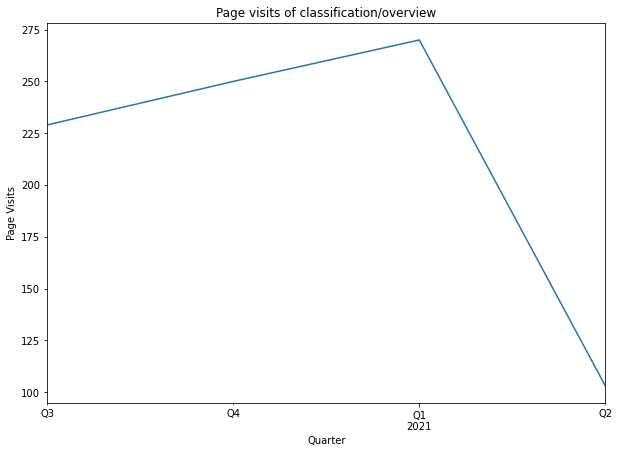

In [11]:
# plot data for top visited page 
plt.figure(figsize=(10,7))
Wb_df[Wb_df.endpoint == 'classification/overview'].endpoint.resample('Q').count().plot()
plt.title('Page visits of classification/overview')
plt.xlabel('Quarter')
plt.ylabel('Page Visits')

Text(0, 0.5, 'Page Visits')

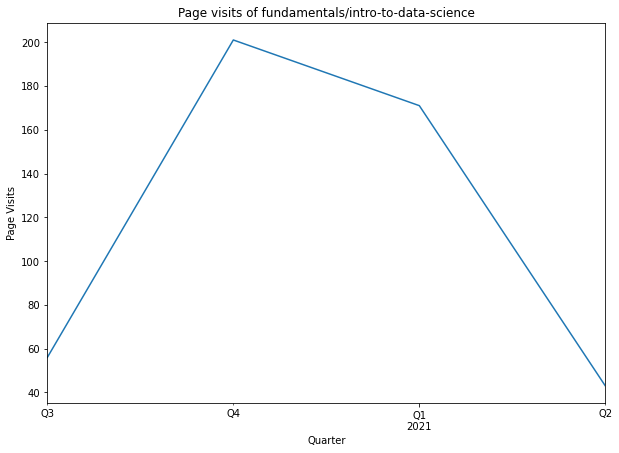

In [12]:
# plot data for lowest of top 5 visited page
plt.figure(figsize=(10,7))
Wb_df[Wb_df.endpoint == 'fundamentals/intro-to-data-science'].endpoint.resample('Q').count().plot()
plt.title('Page visits of fundamentals/intro-to-data-science')
plt.xlabel('Quarter')
plt.ylabel('Page Visits')

In [13]:
# top 5 overall pages
print('5 Most Popular Pages in Web Development Program')

Wb_df.endpoint.value_counts().head(5)

5 Most Popular Pages in Web Development Program


javascript-i    18193
java-iii        13162
html-css        13111
java-ii         12173
spring          11877
Name: endpoint, dtype: int64

Text(0, 0.5, 'Page Visits')

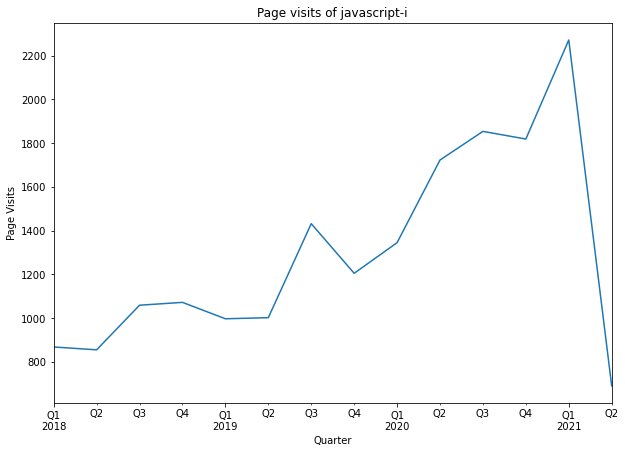

In [14]:
# plot data for top visited page 

plt.figure(figsize=(10,7))
Wb_df[Wb_df.endpoint == 'javascript-i'].endpoint.resample('Q').count().plot()
plt.title('Page visits of javascript-i')
plt.xlabel('Quarter')
plt.ylabel('Page Visits')

Text(0, 0.5, 'Page Visits')

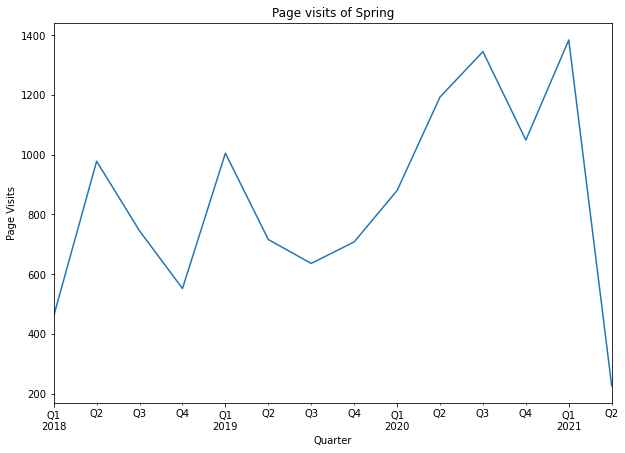

In [15]:
# plot data for lowest of top 5 visited page

plt.figure(figsize=(10,7))
Wb_df[Wb_df.endpoint == 'spring'].endpoint.resample('Q').count().plot()
plt.title('Page visits of Spring')
plt.xlabel('Quarter')
plt.ylabel('Page Visits')

### Takeaways
- For Data Science Program these are the top 5 pages with the most traffic:
    - classification/overview                    | count: 1785
    - 1-fundamentals/1.1-intro-to-data-science   | count: 1633
    - classification/scale_features_or_not.svg   | count: 1590
    - sql/mysql-overview                         | count: 1424
    - fundamentals/intro-to-data-science         | count: 1413
    
- For Web Development these are the top 5 pages with the most traffic:
    - javascript-i    | count: 18193
    - java-iii        | count: 13162
    - html-css        | count: 13111
    - java-ii         | count: 12173
    - spring          | count: 11877

In [16]:
subset = df[(df.endpoint != '/') & (df.cohort_name != 'Staff') & (df.program != 'none')]


In [17]:
subset[['base', 'endpoint']] = subset.endpoint.str.split(pat='/', n=1, expand=True)


In [18]:
subset.base = subset.base.str.lstrip('0123456789.- ')
subset.head()

,time,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program,base
date,,,,,,,,,,,,,,,,
2018-01-26,09:56:02,None,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Web Development,java-ii
2018-01-26,09:56:05,object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Web Development,java-ii
2018-01-26,09:56:06,object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Web Development,slides
2018-01-26,09:56:24,conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,Web Development,javascript-i
2018-01-26,09:56:41,loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,Web Development,javascript-i


In [19]:
ds_curr = subset[subset.program =='Web Development'].base.value_counts().sort_values(ascending=False).to_frame()
ds_curr.head(10)

,base
javascript-i,107525
html-css,76142
mysql,73732
jquery,54073
java-iii,49810
spring,48825
java-ii,48698
java-i,37067
javascript-ii,34823
examples,12279


In [20]:
ds_curr = subset[subset.program =='Data Science'].base.value_counts().sort_values(ascending=False).to_frame()
ds_curr.head(10)

,base
sql,13670
classification,11268
python,10455
fundamentals,8979
regression,7471
stats,6660
clustering,3635
timeseries,3315
nlp,3208
storytelling,2961


### Question 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [21]:
pd.DataFrame(DS_df.endpoint.value_counts().head(5)).index


Index(['classification/overview', '1-fundamentals/1.1-intro-to-data-science',
       'classification/scale_features_or_not.svg', 'sql/mysql-overview',
       'fundamentals/intro-to-data-science'],
      dtype='object')

In [22]:
DS_views = DS_df[(DS_df.endpoint == 'classification/overview') | (DS_df.endpoint == '1-fundamentals/1.1-intro-to-data-science') | (DS_df.endpoint == 'classification/scale_features_or_not.svg') | (DS_df.endpoint == 'sql/mysql-overview') | (DS_df.endpoint == 'fundamentals/intro-to-data-science')]


In [23]:
DS_views = pd.crosstab(DS_views.cohort_id, DS_views.endpoint)


In [24]:
DS_views.columns = ['Classification/Overview','Fundamentals','Classification/Scaling','SQL Overview','Fundamentals/Intro to DS']


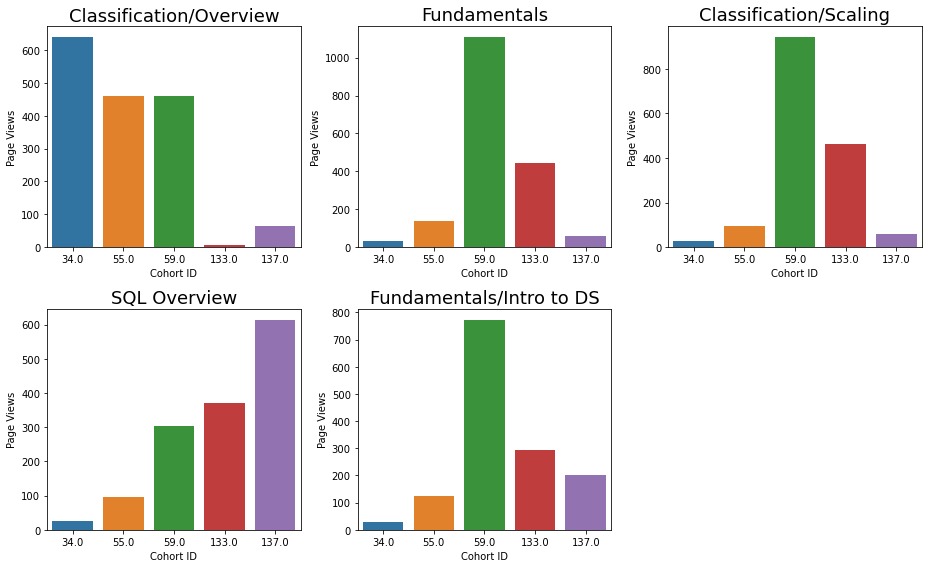

In [25]:
x = 1
plt.figure(figsize=(13,8))
for col in DS_views.columns:
    plt.subplot(2,3,x)
    x = x + 1
    sns.barplot(x=DS_views.index, y=DS_views[col])
    plt.title(col, fontsize=18)
    plt.xlabel("Cohort ID")
    plt.ylabel("Page Views")
    
plt.tight_layout()


In [26]:
# least referred to lessons across all cohorts for Web Development program

ds_curr = subset[subset.program =='Web Development'].base.value_counts().sort_values(ascending=True).to_frame()
ds_curr.head(60)

,base
_Sketch,1
_AcquireSQL,1
main-pages_xXxXx.html,1
interview-questions,1
introduction-to-matplotlib,1
tc-ml,1
syntax-types-and-variables,1
_MissingVals,1
RESTful-api,1
codeupexercises,1


In [27]:
# least referred to lessons across all cohorts for Data Science program

ds_curr = subset[subset.program =='Data Science'].base.value_counts().sort_values(ascending=True).to_frame()
ds_curr.head(60)

,base
gitignore,1
evaluate,1
index.html,1
introduction-to-python,1
itc-ml,1
database-design,1
tidy-data,1
bad-charts,1
sql.mysql-overview,1
end_to_end_clustering,1


In [28]:
# cohort Andromeda
ds_curr = subset[subset.cohort_name =='Andromeda'].base.value_counts().sort_values(ascending=True).to_frame()
ds_curr.head(60)

,base
quiz,1
html,1
tools,1
events,1
jsp-and-jstl,1
sessions-and-cookies,1
documentation,1
sql,1
testing-user-functions,1
capstone,1


In [29]:
# Cohort Apex
ds_curr = subset[subset.cohort_name =='Apex'].base.value_counts().sort_values(ascending=True).to_frame()
ds_curr.head(60)

,base
capstone-workbook,1
interfaces-and-abstract-classes,1
forms,1
tools,2
user-input,2
css-i,3
setup,3
passwords,3
finish-the-adlister,8
elements,23


### Question 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [30]:
df.user_id.nunique()


966

In [31]:
df.user_id.value_counts()

64     13517
11     13123
53     11466
314     7083
1       5600
       ...  
593        1
857        1
212        1
461        1
348        1
Name: user_id, Length: 966, dtype: int64

In [32]:
page_views = df.groupby(['user_id'])['endpoint'].agg(['count', 'unique'])
page_views

,count,unique
user_id,,
1,5600,"[java-ii, java-ii/object-oriented-programming,..."
2,1382,"[javascript-i/conditionals, javascript-i/loops..."
3,1390,"[javascript-i/conditionals, javascript-i/funct..."
4,605,"[javascript-i/functions, javascript-i/introduc..."
5,1493,"[javascript-i/javascript-with-html, javascript..."
...,...,...
976,26,"[javascript-i, javascript-i/javascript-with-ht..."
977,83,"[javascript-i, javascript-i/javascript-with-ht..."
978,32,"[javascript-i, javascript-i/introduction, java..."


### Question 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [36]:
# check when data science program began
df[(df.program == 'Data Science')].head()

,time,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program
date,,,,,,,,,,,,,,,
2019-08-20,09:40:28,3-sql/1-mysql-overview,470,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science
2019-08-20,09:40:30,2-storytelling/bad-charts,467,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science
2019-08-20,09:41:02,1-fundamentals/1.1-intro-to-data-science,469,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science
2019-08-20,09:41:28,1-fundamentals/1.1-intro-to-data-science,480,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science
2019-08-20,09:41:36,1-fundamentals/1.1-intro-to-data-science,482,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science


In [37]:
df.cohort_name.value_counts().sort_index(ascending=True)

Andromeda     22255
Apex          27737
Apollo            4
Arches         7670
Badlands         74
Bash          14773
Bayes         20456
Betelgeuse    26128
Ceres         35113
Curie         16225
Darden        24137
Deimos        28509
Denali            2
Easley        11240
Europa        23838
Florence       5752
Fortuna       30937
Franklin         65
Ganymede      28046
Glacier         510
Hampton        1301
Hyperion      25337
Ike             209
Joshua          271
Jupiter       30744
Kalypso       20757
Kings          2499
Lassen         8910
Luna          14889
Mammoth         599
Marco         13780
Neptune        6111
Niagara         640
Oberon         1374
Olympic        4539
Pinnacles      1855
Quincy          965
Sequoia        5978
Staff         66575
Teddy         26511
Ulysses       24933
Voyageurs     31134
Wrangell      22056
Xanadu        24715
Yosemite      17908
Zion          32755
Name: cohort_name, dtype: int64

In [39]:
# check where data science students are accessing paths related to web development
ds_access_webdev = df[(df.program == 'Data Science') & df.endpoint.str.contains('java')]
ds_access_webdev

,time,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program
date,,,,,,,,,,,,,,,
2019-09-23,11:45:09,java-iii,476,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science
2019-09-25,19:30:44,javascript-i,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science
2019-09-25,19:31:07,javascript-i,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science
2019-09-25,19:31:11,java-i,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science
2019-09-25,19:31:12,javascript-i,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science
2019-09-25,19:31:14,java-i,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science
2019-09-25,19:31:19,java-ii,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science
2019-09-25,19:32:23,javascript-i,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science
2019-09-25,19:32:34,java-i,476,34.0,136.50.49.145,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science


In [40]:
# get the individual user ids that are accessing curriculum outside of their program
set(ds_access_webdev.user_id)

{467, 472, 476, 590}

In [43]:
# check where web development students are accessing paths related to data science
webdev_access_ds = df[(df.program_id.isin([1,2,4])) & (df.endpoint != 'Staff') & (df.endpoint.str.contains('science'))]
webdev_access_ds

,time,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program
date,,,,,,,,,,,,,,,
2019-04-13,01:39:14,datascience,220,25.0,70.120.5.227,25.0,Wrangell,#wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,None,2.0,Web Development
2019-04-13,01:40:39,data-science,220,25.0,70.120.5.227,25.0,Wrangell,#wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,None,2.0,Web Development
2019-08-15,16:21:32,1-fundamentals/1-intro-to-data-science,404,28.0,97.105.19.58,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,None,2.0,Web Development
2019-08-15,16:24:30,1-fundamentals/1-intro-to-data-science,11,28.0,97.105.19.58,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,None,2.0,Web Development
2019-08-16,09:45:58,1-fundamentals/1-intro-to-data-science,11,28.0,97.105.19.58,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,None,2.0,Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-20,10:34:43,fundamentals/intro-to-data-science,11,28.0,76.185.131.226,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,None,2.0,Web Development
2021-04-20,11:13:03,fundamentals/intro-to-data-science,11,28.0,76.185.131.226,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,None,2.0,Web Development
2021-04-21,09:13:45,fundamentals/intro-to-data-science,1,28.0,70.121.199.82,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,None,2.0,Web Development


In [44]:
# get the individual user ids that are accessing curriculum outside of their program
set(webdev_access_ds.user_id)

{1,
 11,
 18,
 20,
 37,
 41,
 53,
 64,
 94,
 124,
 138,
 143,
 146,
 171,
 201,
 211,
 220,
 248,
 249,
 314,
 315,
 373,
 404,
 410,
 417,
 423,
 428,
 430,
 433,
 450,
 451,
 458,
 480,
 495,
 502,
 513,
 521,
 539,
 546,
 572,
 581,
 630,
 742,
 744,
 790,
 813,
 816}

### The first data science cohort graduated in June 2019 (although not in the dataset) so there is no evidence of access to both curriculums before then. There is evidence of data science students accessing web development curriculum and vice versa through 2019 and after although it is limited to 4 data science students and 23 web development students.

In [45]:
# change setting to show all rows
pd.set_option('display.max_rows', 100)

In [46]:
# fullstack_java = df[(df.program == 'fullstack_java') & (df.path != '/')].reset_index()
# data_science = df[(df.program == 'data_science') & (df.path != '/')].reset_index()
# front_end = df[(df.program == 'front_end') & (df.path != '/')].reset_index()
# fullstack_php = df[(df.program == 'fullstack_php') & (df.path != '/')].reset_index()

In [ ]:
# check that all observations are accounted for in the resulting subsets
# fullstack_java.shape[0] + data_science.shape[0] + front_end.shape[0] + fullstack_php.shape[0] + (df.path == '/').sum() == df.shape[0]

In [ ]:
# subset = df[(df.path != '/') & (df.name != 'Staff') & (df.program != 'none')]

### Question 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?


In [48]:
df[['root', 'end_path']] = df.endpoint.str.split(pat='/', n=1, expand=True)

In [49]:
df.root = df.root.str.lstrip('0123456789.- ')
df.head()

,time,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program,root,end_path
date,,,,,,,,,,,,,,,,,
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Web Development,java-ii,None
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Web Development,java-ii,object-oriented-programming
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,Web Development,slides,object_oriented_programming
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,Web Development,javascript-i,conditionals
2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,Web Development,javascript-i,loops


In [50]:
# check top pages for data science
ds_topics = df[(df.program_id == 3) & (df.index > df.end_date)].root.value_counts(ascending=False).to_frame()
ds_topics.head(10)

,root
sql,1550
classification,1232
python,843
fundamentals,750
regression,706
stats,527
timeseries,497
nlp,483
anomaly-detection,364
clustering,280


# The topics that data science students return to the most after graduation are:

1. SQL

2. Fundamentals

3. Classification

4. Python

5. Regression

In [51]:
# check top pages for web development
wd_topics = df[(df.program_id.isin([1,2,4])) & (df.index > df.end_date)].root.value_counts(ascending=False).to_frame()
wd_topics.head(10)

,root
javascript-i,19137
spring,17085
html-css,14482
mysql,13750
java-iii,11459
java-ii,10944
jquery,9830
java-i,9032
content,8216
javascript-ii,8136


### The topics that web development students return to the most after graduation are:

1. Javascript

2. Spring

3. HTML-CSS

4. MySQL

5. Java

### Question 7. Which lessons are least accessed?

In [52]:
# reset index
ds_topics.reset_index(inplace=True)

In [53]:
# rename columns
ds_topics.columns = ('root', 'count')
ds_topics.head()

,root,count
0,sql,1550
1,classification,1232
2,python,843
3,fundamentals,750
4,regression,706


In [54]:
# check the topics that have less than 10 counts
ds_topics[ds_topics['count'] < 10]

,root,count
13,capstones,8
14,mysql,5
15,cli,4
16,scale_features_or_not.svg,3
17,overview,2
18,Selecting_a_hypothesis_test.svg,2
19,acquire-and-prep,1
20,prepare,1
21,spark-local-mode.svg,1
22,spark-execution-diagram.svg,1


### I am going to remove the roots with less than 10 counts as they are files within the curriculum or fall under a main topic

In [55]:
# remove lower counts from dataframe
ds_topics = ds_topics[ds_topics['count'] > 10]

In [56]:
# get least accessed topics for data science
least_accessed = ds_topics.tail(10)
least_accessed

,root,count
3,fundamentals,750
4,regression,706
5,stats,527
6,timeseries,497
7,nlp,483
8,anomaly-detection,364
9,clustering,280
10,distributed-ml,231
11,advanced-topics,178
12,storytelling,169


<AxesSubplot:xlabel='root', ylabel='count'>

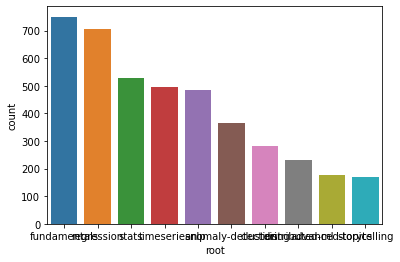

In [57]:
sns.barplot(data=least_accessed, x='root', y='count')

### The topics that web development students return to the least after graduation are:

1. Advanced Topics

2. Storytelling

3. Distributed Machine Learning

4. Clustering

5. Natural Language Processing